Arata SUZUKI, Gabriel BIGNET
majeure IMAGE 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Les transactions des acteurs clés du marché du Bitcoin : une étude de leur influence sur l'évolution des prix

Depuis sa création en 2009, le Bitcoin est devenu une monnaie virtuelle largement utilisée et échangée sur les marchés financiers. Le cours du Bitcoin est soumis à de fortes variations, en raison de son caractère décentralisé et de sa volatilité. Dans ce contexte, l'influence des transactions des grands acteurs du marché du Bitcoin sur le cours de cette cryptomonnaie est un sujet d'étude important.

Dans ce projet, nous avons étudié les transactions des dix premiers acteurs du marché du Bitcoin et leur impact sur le cours du Bitcoin. Pour ce faire, nous avons utilisé plusieurs bases de données dont on dispose pour analyser les mouvements de fonds de ces acteurs. Nous avons également examiné le cours du Bitcoin sur la même période, afin de déterminer s'il y avait une corrélation entre les transactions des acteurs et l'évolution du cours.

Dans cet article, nous présenterons les résultats de notre étude, qui étudient si les transactions des grands acteurs du marché du Bitcoin ont un impact significatif sur le cours de cette monnaie virtuelle. Nous avons identifié les acteurs les plus influents et avons effectué une analyse mathématique pour déterminer les corrélations entre leurs transactions et le cours du Bitcoin. Nous avons également comparé visuellement les résultats de notre étude des transactions avec l'évolution du cours du Bitcoin au fil du temps.

Cette étude est importante car elle fournit des informations cruciales sur l'évolution du marché du Bitcoin et la manière dont les transactions des grands acteurs peuvent influencer le cours de cette monnaie virtuelle. Ces résultats peuvent être utiles pour les investisseurs, les analystes financiers et les régulateurs financiers qui souhaitent comprendre le fonctionnement du marché du Bitcoin et prendre des décisions éclairées en matière d'investissement.


On dispose pour cette étude des differentes données telles que les différentes informations liées aux transactions de bitcoin effectuées entre 2015 et 2017 ainsi que l'évolution du cours du bitcoin entre 2015 et 2017.

On commence par extraire les données qui nous intéressent et les stocker sous forme de dataframe

In [2]:
file =("./DefiEGC2024/timeseries/blockchain_by_actor.csv")

df = pd.read_csv(file)


In [3]:
file2 =("./DefiEGC2024/timeseries/external.csv")
df2 = pd.read_csv(file2)

Nous allons maintenant procéder à la correction des tableaux en supprimant une colonne inutile, puis en nettoyant les données, en supprimant les lignes qui ne comportent pas de date.

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop(df[df['year'] == 0].index, inplace=True)
df

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.000000e+00,0.000000e+00,8.0,1.277500e+09
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.000000e+00,0.000000e+00,2.0,1.174552e+09
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,1.415897e+07,1.415897e+07,22.0,1.399538e+08
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.000000e+00,0.000000e+00,108.0,1.842989e+10
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,3.504457e+07,3.504457e+07,84.0,1.778579e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90339,2017.0,6.0,30.0,BTCC.com,3.785757e+08,54.0,2017-06-30,0.0,0.000000,12.0,3.785757e+08,0.000000e+00,0.000000e+00,12.0,3.785757e+08
90340,2017.0,6.0,30.0,BTC-e.com,3.369045e+11,4265.0,2017-06-30,85002381.0,0.021072,74.0,5.887602e+11,0.000000e+00,5.733294e+11,74.0,1.543080e+10
90341,2017.0,6.0,30.0,35,2.808881e+10,1024.0,2017-06-30,65380833.0,1.774006,402.0,2.851905e+10,0.000000e+00,2.989980e+09,804.0,2.552907e+10
90342,2017.0,6.0,30.0,999Dice.com,8.133324e+08,422.0,2017-06-30,3005761.0,6.828742,59.0,2.058016e+08,1.704935e+07,1.704935e+07,91.0,1.887522e+08


In [5]:
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2

,date,PriceUSD,HashRate
0,2015-01-02,315.942732,3.333450e+05
1,2015-01-03,285.647310,3.272842e+05
2,2015-01-04,263.334575,3.474869e+05
3,2015-01-05,275.003852,3.151626e+05
4,2015-01-06,287.549521,3.192031e+05
...,...,...,...
906,2017-06-26,2426.365051,5.023770e+06
907,2017-06-27,2530.345536,4.634604e+06
908,2017-06-28,2562.792264,5.554450e+06
909,2017-06-29,2540.443032,4.245439e+06


## Identification et Classification des acteurs

Pour identifier les acteurs clés du marché du Bitcoin, nous allons regrouper les données des transactions dont nous disposons par acteur. Cela va nous permettre de calculer la somme totale de Bitcoins reçus et dépensés par chaque acteur, ainsi que d'autres statistiques telles que le nombre total de transactions effectuées et le nombre de Bitcoins dépensés par l'acteur lui-même.

Une fois les données agrégées, nous allons trier les résultats par ordre décroissant de montants dépensés pour identifier les acteurs majeurs du marché. Nous avons utilisé cette méthode car les acteurs qui effectuent des transactions importantes et qui ont un impact sur le marché sont souvent ceux qui vendent ou achètent des quantités importantes de Bitcoin.

In [6]:
df_grouped = df.groupby(by="identity")

df_agg = df_grouped.agg({"received": "sum", "spent": "sum", "nb_received": "sum", "nb_transactions": "sum", "nb_spent": "sum", "self_spent": "sum", "self_spent_estimated": "sum"})

df_sorted = df_agg.sort_values(by=["spent"], ascending=False)

df_actors = df_sorted.head(20)

df_actors


,received,spent,nb_received,nb_transactions,nb_spent,self_spent,self_spent_estimated
identity,,,,,,,
ePay.info_CoinJoinMess,1.188925e+15,1.169524e+15,18426297.0,2310681.0,22238612.0,3.659520e+15,3.681925e+15
Huobi.com,1.313671e+15,7.794348e+14,4409112.0,1765905.0,3510036.0,1.733032e+15,2.266546e+15
Bitstamp.net,6.997821e+14,4.153298e+14,669271.0,148737.0,821053.0,7.274781e+14,1.011050e+15
Poloniex.com,4.333840e+14,3.643295e+14,3213211.0,251594.0,2804715.0,4.509973e+15,4.578636e+15
BTCC.com,3.220673e+14,2.694767e+14,604158.0,29978.0,165707.0,8.154946e+12,6.075103e+13
CoinTrader.net_LocalBitcoins.com,3.136092e+14,2.630507e+14,1297272.0,130436.0,380778.0,1.768837e+14,2.264575e+14
BTC-e.com,5.370579e+14,2.569457e+14,2631193.0,105027.0,109620.0,1.058226e+13,2.906695e+14
OKCoin.com,4.589288e+14,1.533042e+14,1155532.0,61884.0,122572.0,6.836788e+12,3.124480e+14
Xapo.com,2.360818e+14,1.381389e+14,11963430.0,1877020.0,5689171.0,9.862885e+14,1.076690e+15


Nous avons choisi de considérer les transactions 'spent' plutôt que 'received' dans cette analyse, car cela permet de mettre l'accent sur les acteurs qui ont un impact sur le marché en achetant des quantités importantes de Bitcoin. Les acteurs qui reçoivent des transactions peuvent être simplement des portefeuilles ou des adresses de stockage, et ne représentent donc pas nécessairement des acteurs qui ont un impact significatif sur le marché.

En considérant les transactions 'spent', nous pouvons identifier les acteurs qui effectuent des transactions importantes et qui ont un impact sur le marché, en particulier ceux qui achetent des quantités importantes de Bitcoin. Cela peut nous aider à mieux comprendre les tendances et les mouvements du marché, ainsi qu'à détecter d'éventuelles manipulations ou activités suspectes.

En somme, en se concentrant sur les transactions 'spent', nous sommes en mesure d'identifier les acteurs qui ont un impact significatif sur le marché et d'obtenir une vue plus précise de la dynamique du marché du Bitcoin. Et dans tous les cas les 10 premiers acteurs restents les memes a l'ordre près meme si on considere les transactions 'received'


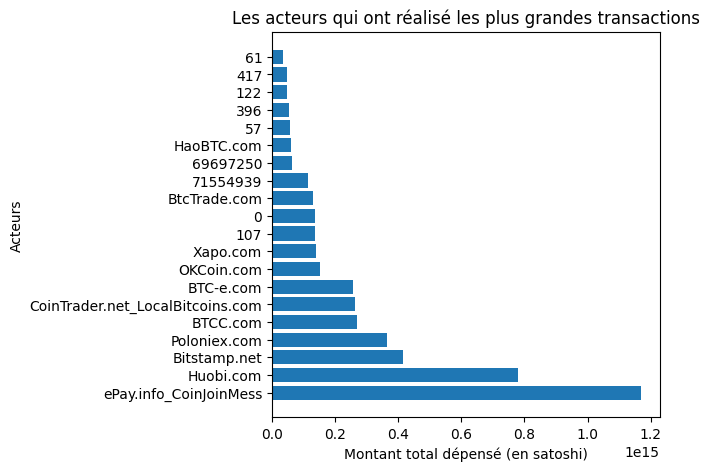

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

barplot = ax.barh(df_actors.index, df_actors['spent'])

ax.set_title('Les acteurs qui ont réalisé les plus grandes transactions')
ax.set_xlabel('Montant total dépensé (en satoshi)')
ax.set_ylabel('Acteurs')

plt.yticks(rotation=0)
plt.show()

Il est intéressant de noter qu'il existe une grande différence entre les 7 premiers acteurs et les autres, ainsi qu'entre les 14 premiers acteurs et les autres. Par conséquent, nous avons décidé de nous concentrer sur les 10 premiers acteurs, car ils représentent la majeure partie des transactions sur le marché, du moins en termes de montant dépensé.

In [8]:
df_actors = df_actors.head(10)
df_actors

,received,spent,nb_received,nb_transactions,nb_spent,self_spent,self_spent_estimated
identity,,,,,,,
ePay.info_CoinJoinMess,1.188925e+15,1.169524e+15,18426297.0,2310681.0,22238612.0,3.659520e+15,3.681925e+15
Huobi.com,1.313671e+15,7.794348e+14,4409112.0,1765905.0,3510036.0,1.733032e+15,2.266546e+15
Bitstamp.net,6.997821e+14,4.153298e+14,669271.0,148737.0,821053.0,7.274781e+14,1.011050e+15
Poloniex.com,4.333840e+14,3.643295e+14,3213211.0,251594.0,2804715.0,4.509973e+15,4.578636e+15
BTCC.com,3.220673e+14,2.694767e+14,604158.0,29978.0,165707.0,8.154946e+12,6.075103e+13
CoinTrader.net_LocalBitcoins.com,3.136092e+14,2.630507e+14,1297272.0,130436.0,380778.0,1.768837e+14,2.264575e+14
BTC-e.com,5.370579e+14,2.569457e+14,2631193.0,105027.0,109620.0,1.058226e+13,2.906695e+14
OKCoin.com,4.589288e+14,1.533042e+14,1155532.0,61884.0,122572.0,6.836788e+12,3.124480e+14
Xapo.com,2.360818e+14,1.381389e+14,11963430.0,1877020.0,5689171.0,9.862885e+14,1.076690e+15


La première étape de notre étude a consisté à identifier les principaux acteurs du marché du Bitcoin. Nous avons établi une liste des dix acteurs les plus importants, en fonction de leur volume de transactions.

Parmi les acteurs que nous avons identifiés, nous avons remarqué que les plus importants étaient des gros sites de transactions de cryptomonnaies tels que Poloniex.com, Bitstamp.net, Huobi.com, BTCC.com, etc. Ces bourses sont des lieux de transaction clés pour les traders de Bitcoin et sont souvent utilisées comme références pour le prix du Bitcoin.

Il existe d'autres acteurs, tels que des portefeuilles ou des investisseurs individuels qui sont représenté par des adresses identifiées (par exemple 107 dans les 10 premiers), mais leur influence sur le marché semble moindre en comparaison des bourses de cryptomonnaies.

Il existe quatre catégories d'acteurs sur le marché du Bitcoin :

- ### Les bourses de cryptomonnaies
    Les bourses de cryptomonnaies, telles que Poloniex.com, Bitstamp.net, Huobi.com et BTCC.com, sont des plateformes clés pour les transactions de Bitcoin. Elles fournissent une plateforme sécurisée pour les traders et permettent la conversion de Bitcoin en monnaie fiduciaire. En raison de leur position centrale dans le marché, les bourses de cryptomonnaies ont une influence significative sur le prix du Bitcoin.

- ### Les mineurs
    Les mineurs de Bitcoin sont responsables de la création de nouveaux blocs de transactions sur la blockchain. Ils sont récompensés pour leur travail en recevant de nouvelles unités de Bitcoin. Les mineurs ont un rôle crucial dans le maintien de la sécurité et de la stabilité de la blockchain Bitcoin.

- ### Les investisseurs institutionnels
    Les investisseurs institutionnels, tels que les fonds d'investissement, les banques et les sociétés d'investissement, ont un rôle croissant dans le marché du Bitcoin. Ils sont attirés par la croissance rapide du marché de la cryptomonnaie et cherchent à tirer profit des fluctuations des prix du Bitcoin.

- ### Les investisseurs individuels
    Les investisseurs individuels représentent une part importante du marché du Bitcoin. Ils achètent et vendent du Bitcoin pour diverses raisons, allant de la spéculation à l'utilisation pratique de la cryptomonnaie.

Cette étape initiale nous a permis de cibler les acteurs les plus importants et de nous concentrer sur leurs transactions pour déterminer leur impact sur le cours de la cryptomonnaie.

## Etude des transactions des 10 premiers acteurs

Nous avons choisi de nous concentrer sur les 10 premiers acteurs du marché, ceux qui effectuent la majeure partie des transactions en termes de montants dépensés. Pour ce faire, nous avons filtré le DataFrame original afin de ne garder que les transactions effectuées par ces 10 acteurs.

In [9]:
df_filtered = df[df["identity"].isin(df_actors.index)]

df_filtered

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
10,2015.0,1.0,1.0,Bitstamp.net,1.451551e+11,443.0,2015-01-01,6.000000e+06,0.012160,44.0,9.182064e+10,1.775141e+10,1.775141e+10,227.0,7.406924e+10
18,2015.0,1.0,1.0,Poloniex.com,1.861432e+10,597.0,2015-01-01,2.040000e+06,1.735483,166.0,1.808510e+10,1.780665e+09,1.780665e+09,397.0,1.630444e+10
22,2015.0,1.0,1.0,ePay.info_CoinJoinMess,5.482961e+11,12818.0,2015-01-01,3.823991e+07,0.524910,1148.0,2.470622e+12,1.794224e+12,1.898125e+12,20749.0,5.724979e+11
26,2015.0,1.0,1.0,107,6.806906e+09,58.0,2015-01-01,2.000000e+05,0.011290,33.0,5.748013e+09,0.000000e+00,0.000000e+00,53.0,5.748013e+09
35,2015.0,1.0,1.0,Huobi.com,5.952196e+11,842.0,2015-01-01,9.900000e+05,0.005587,129.0,9.840645e+11,3.822187e+11,7.500509e+11,243.0,2.340136e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,2017.0,6.0,30.0,Huobi.com,2.192419e+11,1538.0,2017-06-30,5.629823e+07,0.015074,94.0,5.834738e+11,3.437132e+11,3.437132e+11,657.0,2.397607e+11
90334,2017.0,6.0,30.0,Bitstamp.net,9.291938e+11,2771.0,2017-06-30,2.898764e+08,0.951442,274.0,8.589265e+12,7.866769e+12,7.880971e+12,2753.0,7.082938e+11
90337,2017.0,6.0,30.0,Poloniex.com,1.159232e+12,14076.0,2017-06-30,1.149520e+09,3.536423,476.0,9.652027e+12,8.216202e+12,8.226202e+12,14469.0,1.425825e+12
90339,2017.0,6.0,30.0,BTCC.com,3.785757e+08,54.0,2017-06-30,0.000000e+00,0.000000,12.0,3.785757e+08,0.000000e+00,0.000000e+00,12.0,3.785757e+08


Ensuite nous allons tracer un graphe des dépenses totales quotidiennes des 10 premiers acteurs car cela nous permet de visualiser les tendances dans les transactions des acteurs clés du marché. En observant les fluctuations quotidiennes des dépenses totales, nous pouvons peut-être déduire des informations sur les comportements des acteurs individuels et sur la manière dont ils influencent le marché dans son ensemble.

/tmp/ipykernel_15170/2846332105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["date"] = pd.to_datetime(df_filtered[["year", "month", "day"]])


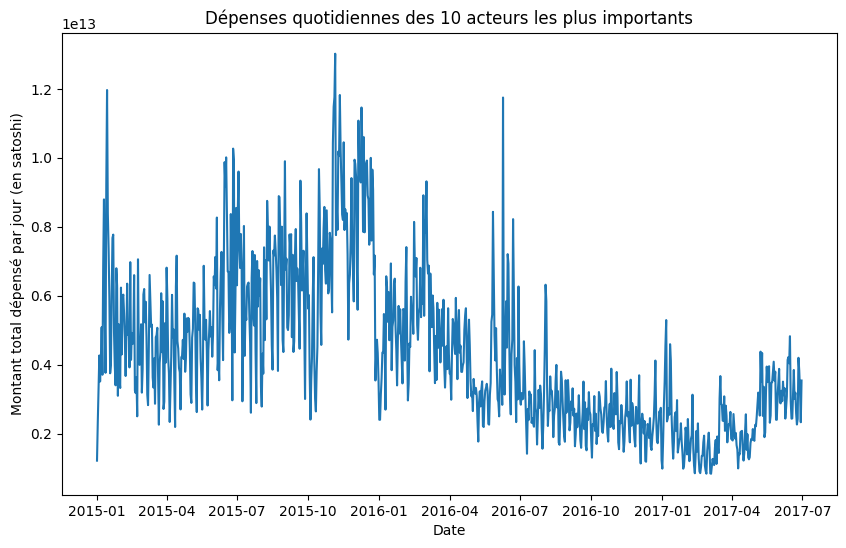

In [10]:
# Transformation de la colonne date en datetime
df_filtered["date"] = pd.to_datetime(df_filtered[["year", "month", "day"]])

# Groupement par jour
df_daily = df_filtered.groupby(by=["date"]).agg({"spent": "sum"})

plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily["spent"])
plt.title("Dépenses quotidiennes des 10 acteurs les plus importants")
plt.xlabel("Date")
plt.ylabel("Montant total dépensé par jour (en satoshi)")
plt.show()

Ce graphe montre que les dépenses de ces acteurs oscillent entre 0,2e13 et 1.2e13 satoshi, avec quelques fluctuations importantes à court terme.
Ces pics de dépenses totales occasionnels, pourraient être liés à des événements spécifiques sur le marché ou à des comportements individuels des acteurs clés.

Pour mieux visualiser et mieux comprendre les activités des différents acteurs, nous allons maintenant tracer les dépenses quotidiennes de chaque acteur indépendemment

**(Attention notre code produit un Warning mais fonctionne correctement, il faut scroller pour voir les graphes)**

/tmp/ipykernel_15170/1190701159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])
/tmp/ipykernel_15170/1190701159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])
/tmp/ipykernel_15170/1190701159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

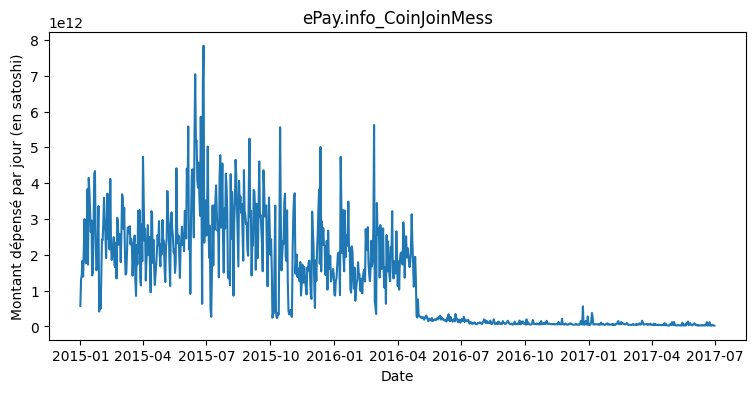

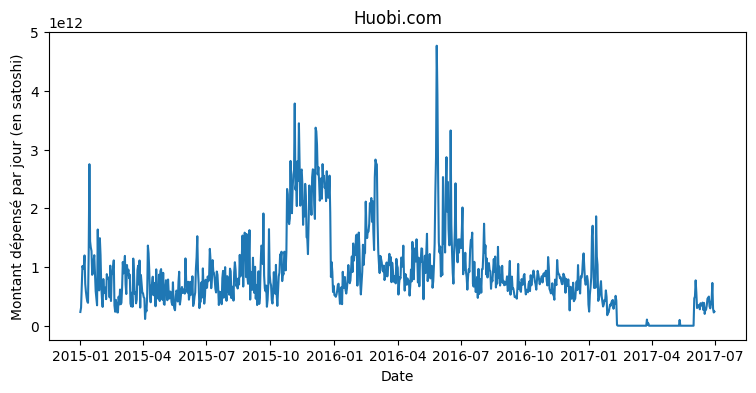

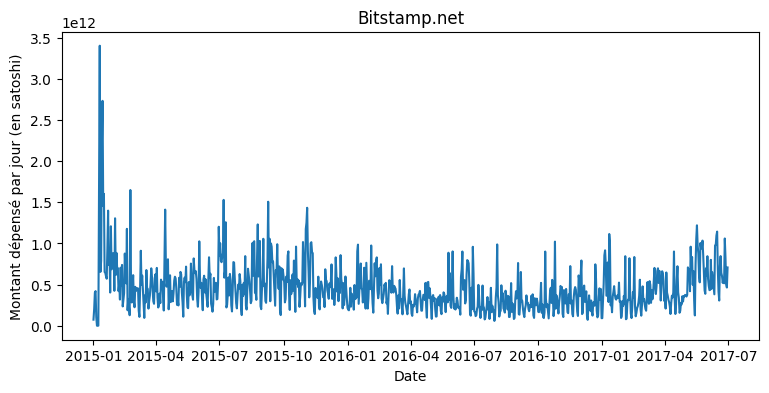

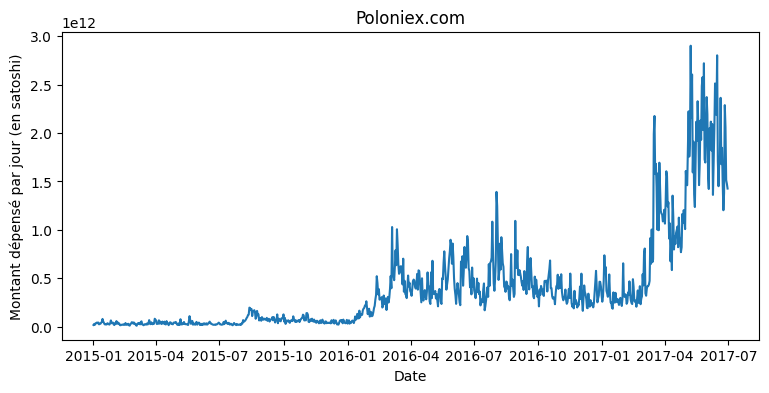

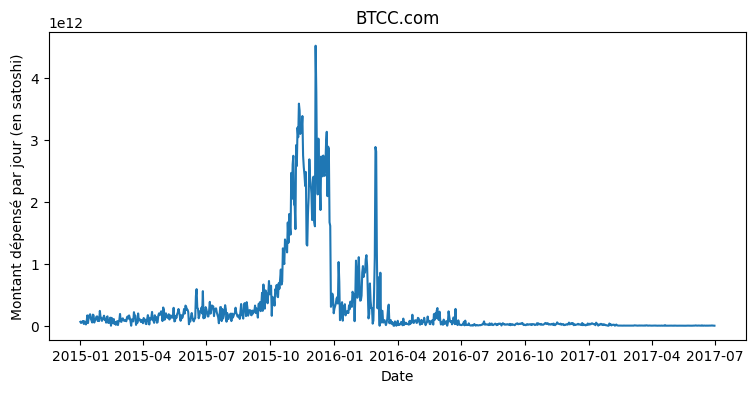

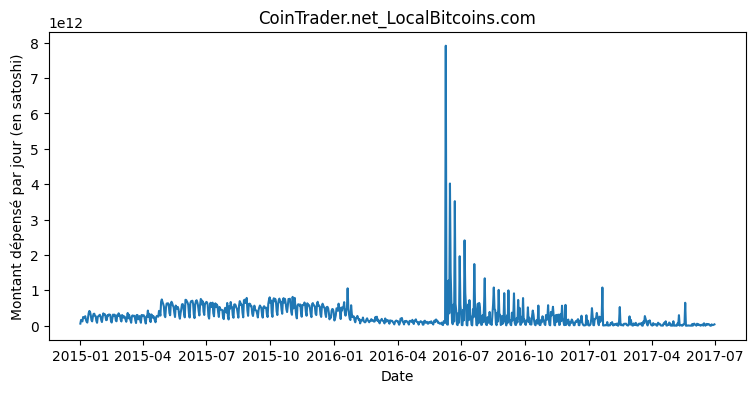

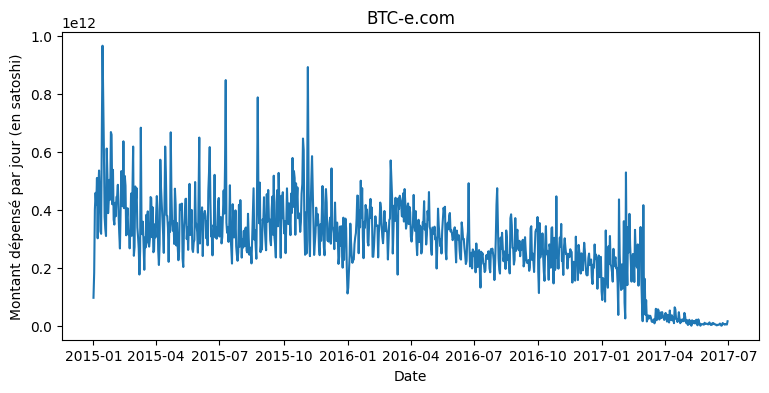

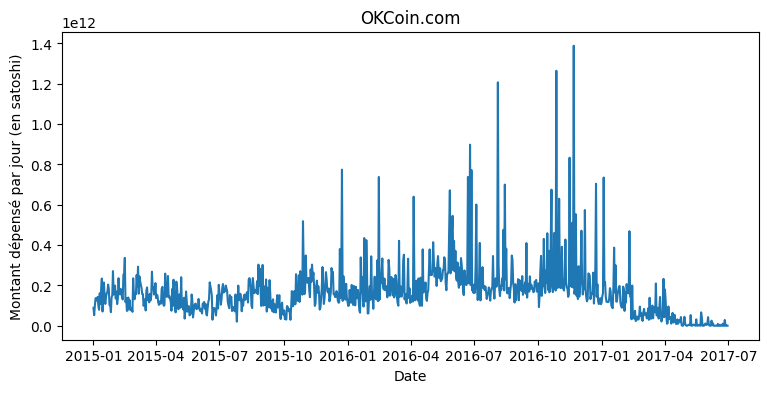

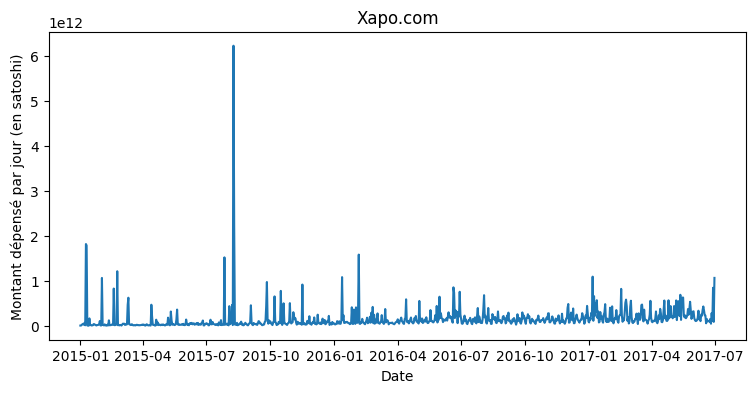

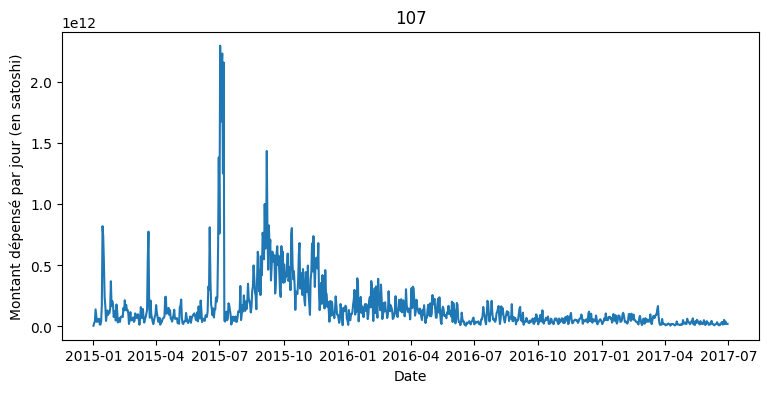

In [11]:
for actor in df_actors.index:
    fig, ax = plt.subplots(figsize=(9,4))

    # Sélection des transactions de l'acteur et calcul de la somme des dépenses par jour
    actor_df = df.loc[df["identity"] == actor]
    actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])
    actor_df.set_index("date", inplace=True)
    actor_df_spent = actor_df[["spent"]].resample("D").sum()

    ax.plot(actor_df_spent.index, actor_df_spent["spent"])
    ax.set_xlabel("Date")
    ax.set_ylabel("Montant dépensé par jour (en satoshi)")
    ax.set_title(actor)

plt.show()

Pour approfondir notre étude des transactions des 10 premiers acteurs, nous avons tracé les transactions quotidiennes de chacun de ces acteurs sur la période couverte par nos données. Voici les observations que nous avons pu faire pour chacun des acteurs :

- **ePay.info_CoinJoinMess** : les transactions de cet acteur étaient globalement importantes entre 2015 et avril 2016, mais ont ensuite diminué considérablement.
- **Huobi.com** : cet acteur a connu des oscillations importantes dans ses transactions, avec des pics en fin d'année 2015 et en milieu d'année 2016, mais une chute assez conséquente en 2017.
- **Bitstamp.net** : à part un pic en début d'année 2015, les transactions de cet acteur ont oscillé de manière assez stable sur la période couverte par nos données.
- **Poloniex.com** : les transactions de cet acteur sont restées modestes jusqu'en 2016, mais ont ensuite progressivement augmenté pour atteindre un pic en 2017.
- **BTCC.com** : cet acteur a connu des pics importants de transactions fin 2015 et début 2016, mais les transactions ont ensuite diminué.
- **CoinTrader.net_LocalBitcoins.com** : les transactions de cet acteur ont été globalement stables avec de petites oscillations, mais ont connu des pics très importants en milieu et fin d'année 2017.
- **BTC-e.com** : les transactions de cet acteur ont oscillé de manière assez stable sur la période couverte par nos données, mais ont chuté en 2017.
- **OKCoin.com** : cet acteur a connu des oscillations assez stables avec quelques pics, mais sans transactions très importantes.
- **Xapo.com** : les transactions de cet acteur ont été assez stables et sans montants très importants, mais avec des pics extrêmes à des dates particulières.
- **107** : cet acteur a connu des pics importants de transactions en 2015, mais les transactions sont ensuite restées stables avec de petites oscillations.

Globalement, nos observations montrent des profils de transactions assez différents entre les différents acteurs, avec des périodes de pics pour certains et des oscillations plus stables pour d'autres. Dans la section suivante, nous allons étudier le cours du Bitcoin pour déterminer s'il existe une corrélation entre les transactions des acteurs et le prix du Bitcoin.

## Etudes et Analyses des transactions par rapport au cours du Bitcoin

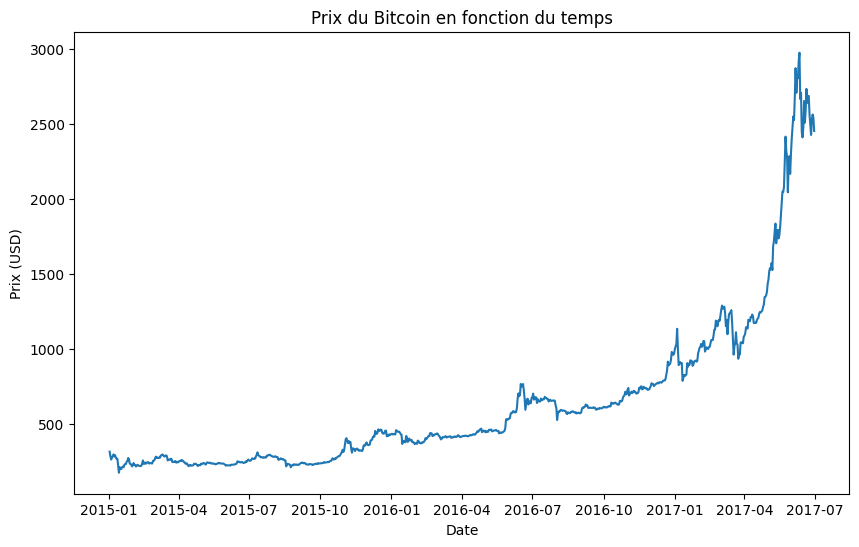

In [12]:
plt.figure(figsize=(10,6))
df2['date'] = pd.to_datetime(df2['date'])
plt.plot(df2['date'], df2['PriceUSD'])

plt.xlabel('Date')
plt.ylabel('Prix (USD)')
plt.title('Prix du Bitcoin en fonction du temps')
plt.show()

Le cours du Bitcoin est un facteur crucial dans l'étude de l'influence des transactions des grands acteurs du marché sur le cours du Bitcoin. Pour cette étude, nous avons utilisé les données du cours du Bitcoin entre 2015 et 2017, afin de comprendre les tendances et les événements qui ont influencé le cours de cette cryptomonnaie.

En utilisant les données fournies, nous avons tracé un graphique représentant l'évolution du cours du Bitcoin pendant cette période. Nous avons observé que le cours avait augmenté de manière relativement linéaire de 2015 à fin 2016, passant de 200 USD à 1000 USD. Cependant, à partir de 2017, le cours du Bitcoin a commencé à exploser, atteignant 3000 USD vers juin 2017.

Il convient de noter que le cours du Bitcoin a été influencé par de nombreux facteurs au cours de cette période, notamment les événements politiques et économiques mondiaux. Par exemple, la décision du Royaume-Uni de quitter l'Union européenne, également connue sous le nom de Brexit, a eu un impact sur la valeur du Bitcoin. De même, la politique fiscale et monétaire des États-Unis a également joué un rôle dans la fluctuation du cours du Bitcoin.

En outre, des événements propres au marché des cryptomonnaies ont également eu un impact sur le cours du Bitcoin. Par exemple, le piratage de la plateforme d'échange Mt. Gox en 2014 a eu un effet durable sur le marché des cryptomonnaies, affectant également le cours du Bitcoin.

Nous allons maintenant comparer les transactions des 10 premiers acteurs avec le cours du Bitcoin en superposant leurs graphes, dans le but de rechercher une possible corrélation entre les deux.

**(Attention notre code produit un Warning mais fonctionne correctement, il faut scroller pour voir les graphes)**

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


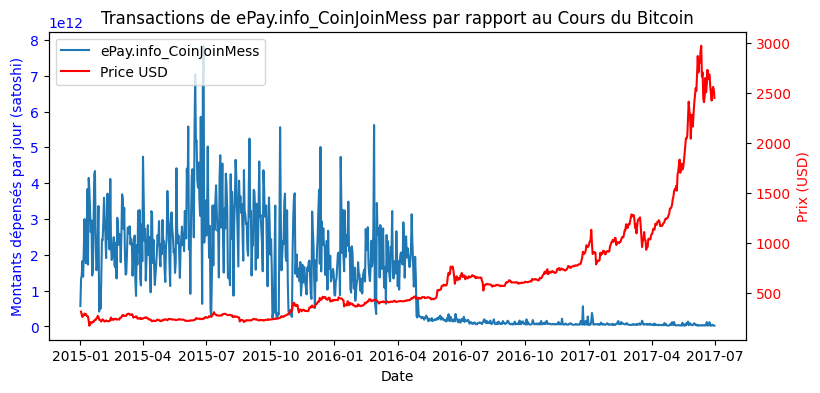

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


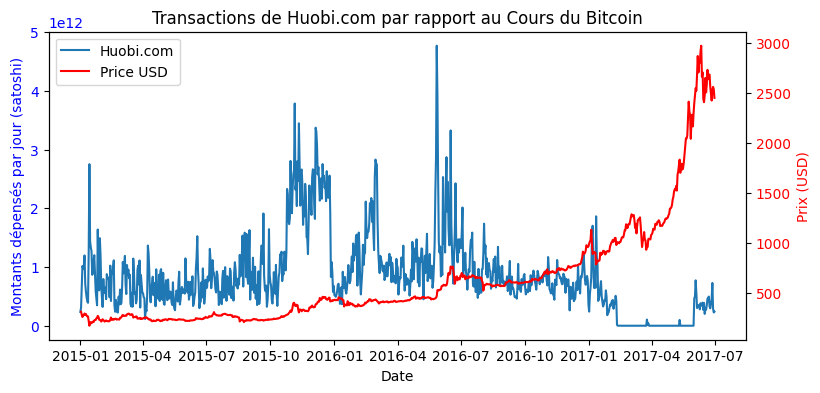

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


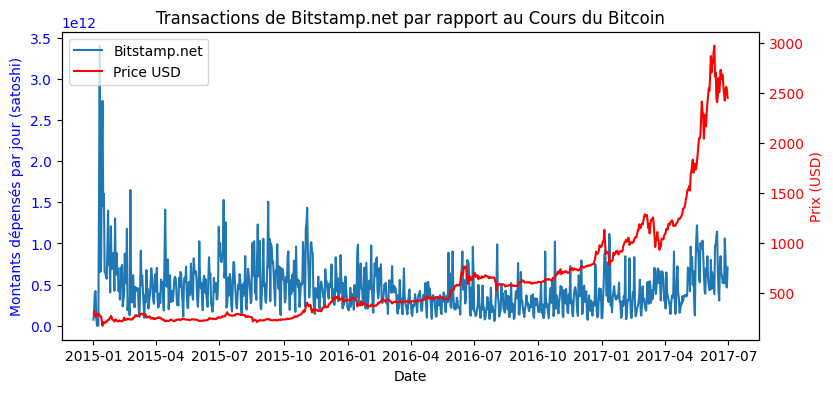

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


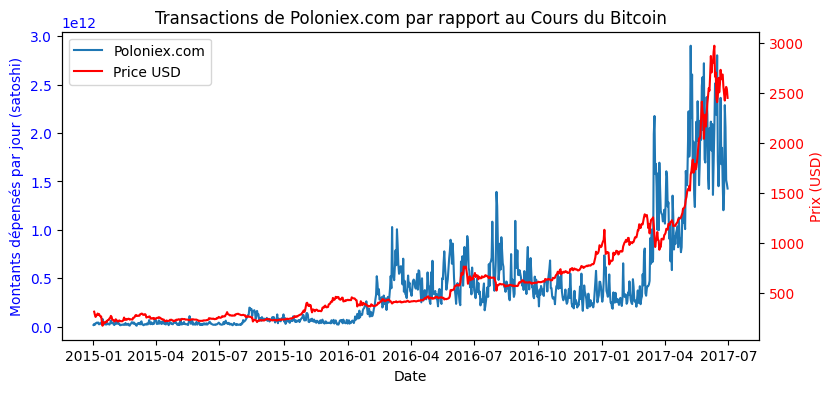

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


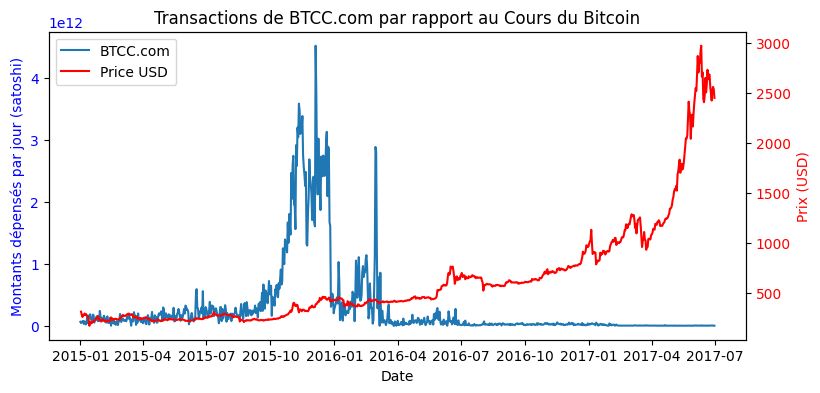

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


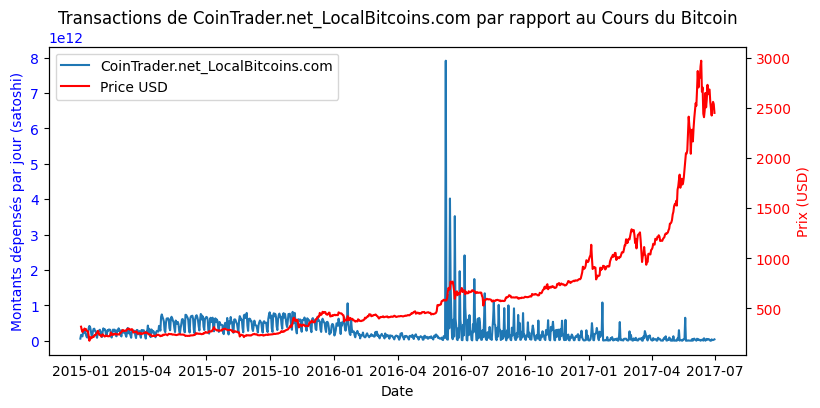

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


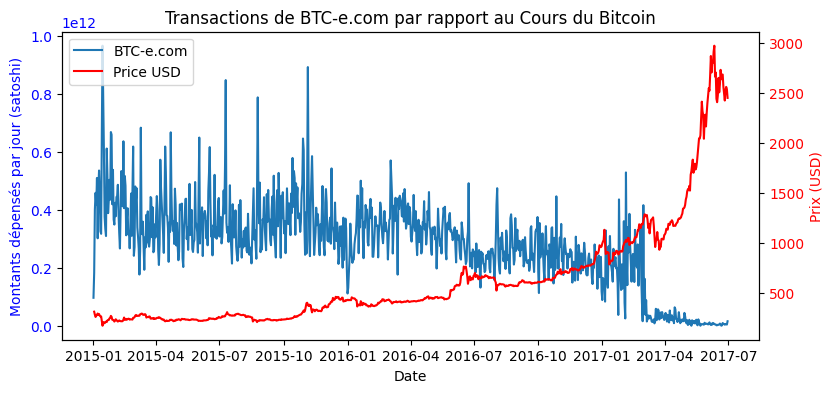

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


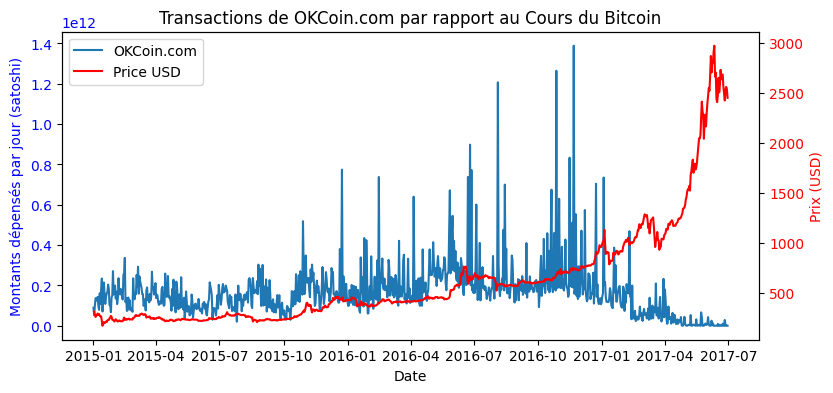

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


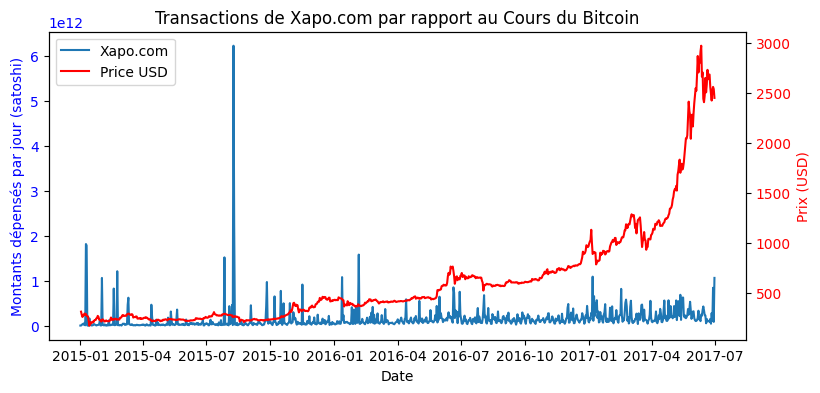

/tmp/ipykernel_15170/3427657636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


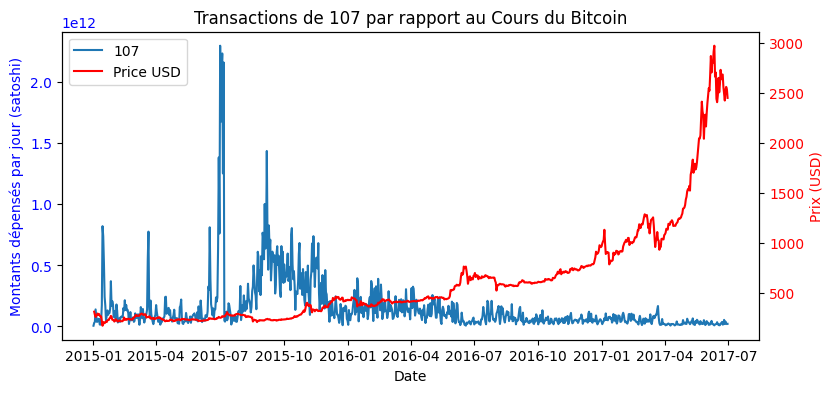

In [13]:
for actor in df_actors.index:
    fig, ax1 = plt.subplots(figsize=(9, 4))

    # Sélection des transactions de l'acteur et calcul de la somme des dépenses par jour
    actor_df = df.loc[df["identity"] == actor]
    actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])
    actor_df.set_index("date", inplace=True)
    actor_df_spent = actor_df[["spent"]].resample("D").sum()

    ax1.plot(actor_df_spent.index, actor_df_spent['spent'], label=actor)

    # Personnalisation du premier axe
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Montants dépensés par jour (satoshi)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(df2['date'], df2['PriceUSD'], color='red', label="Price USD")

    # Personnalisation du deuxième axe
    ax2.set_ylabel("Prix (USD)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Titre et légende du graphe
    plt.title(f'Transactions de {actor} par rapport au Cours du Bitcoin')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    plt.show()


La superposition des graphiques des transactions de chacun des acteurs avec le cours du bitcoin a permis de visualiser une éventuelle corrélation entre les deux. Les résultats montrent que globalement, il n'y a pas de corrélation visuelle évidente entre les transactions des acteurs et le cours du bitcoin. Cependant, une corrélation est clairement visible pour Poloniex.com.

En effet, en examinant la superposition du graphe des transactions de Poloniex.com avec le cours du bitcoin, on peut observer une corrélation directe. On constate que les pics de transactions de Poloniex.com coïncident souvent avec des pics dans le cours du bitcoin. Par exemple, le pic de transactions en mars 2017 de Poloniex.com coïncide avec une augmentation significative du cours du bitcoin à la même période.

Cependant, la corrélation visuelle entre les transactions de Poloniex.com et le cours du bitcoin ne suffit pas à établir une corrélation mathématique. Il est donc nécessaire d'effectuer une analyse mathématique pour déterminer l'existence d'une corrélation réelle entre les deux variables.

In [14]:
for actor in df_actors.index:
    actor_df = df.loc[df["identity"] == actor]
    actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])
    actor_df.set_index("date", inplace=True)
    actor_df_spent = actor_df[["spent"]].resample("D").sum()
    
    actor_df_spent = actor_df_spent.drop(actor_df_spent.index[0])

    z_col1 = (actor_df_spent["spent"] - np.mean(actor_df_spent["spent"])) / np.std(actor_df_spent["spent"])
    z_col2 = (df2["PriceUSD"] - np.mean(df2["PriceUSD"])) / np.std(df2["PriceUSD"])

    # Calcul de la corrélation entre les deux colonnes
    corr = np.corrcoef(z_col1, z_col2)[0, 1]

    print("Corrélation de",actor," : ", corr)

    


/tmp/ipykernel_15170/2708496948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])


Corrélation de ePay.info_CoinJoinMess  :  -0.5528584365690891
Corrélation de Huobi.com  :  -0.3803538783858943
Corrélation de Bitstamp.net  :  0.027757283745683186
Corrélation de Poloniex.com  :  0.8569913274242608
Corrélation de BTCC.com  :  -0.23223689872873093
Corrélation de CoinTrader.net_LocalBitcoins.com  :  -0.2741751699575233
Corrélation de BTC-e.com  :  -0.7361605949775061
Corrélation de OKCoin.com  :  -0.28334048095598985
Corrélation de Xapo.com  :  0.15314256359507974
Corrélation de 107  :  -0.3093575305835502


/tmp/ipykernel_15170/2708496948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])
/tmp/ipykernel_15170/2708496948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_df["date"] = pd.to_datetime(actor_df[["year", "month", "day"]])
/tmp/ipykernel_15170/2708496948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

La corrélation entre les transactions de chaque acteur et le cours du bitcoin est un aspect important de notre étude, car elle peut nous aider à comprendre comment ces acteurs peuvent affecter le marché de la cryptomonnaie. Pour mesurer cette corrélation, nous avons utilisé la fonction numpy.corrcoeff, après avoir normalisé les deux variables car elles ne sont pas à la même échelle.

Les résultats montrent que la plupart des acteurs n'ont pas de corrélation significative avec le cours du bitcoin. Cependant, Poloniex.com est un cas à part, car nous avons remarqué une corrélation assez forte entre ses transactions et le cours du bitcoin. Cette corrélation est positive, ce qui signifie que lorsque les transactions sur Poloniex augmentent, le cours du bitcoin a tendance à augmenter également. Cette observation est cohérente et confirme notre observation précédente que Poloniex est un acteur important du marché de la cryptomonnaie, et que ses activités peuvent influencer le cours du bitcoin.

En revanche, d'autres acteurs tels que BTC-e.com ont une corrélation négative avec le cours du bitcoin, ce qui signifie que leurs transactions ont tendance à diminuer lorsque le cours du bitcoin augmente, et vice versa. Cette observation peut suggérer que ces acteurs ont une influence limitée sur le marché de la cryptomonnaie, ou que leurs activités sont opposées à celles des autres acteurs.

En somme, l'analyse de la corrélation entre les transactions des acteurs et le cours du bitcoin nous a permis de mieux comprendre comment ces acteurs peuvent affecter le marché de la cryptomonnaie. Bien que la plupart des acteurs n'aient pas de corrélation significative avec le cours du bitcoin, certains comme Poloniex.com peuvent avoir une influence importante sur le marché. Ces résultats peuvent être utiles pour les investisseurs et les régulateurs qui cherchent à comprendre comment le marché de la cryptomonnaie fonctionne et comment il peut être affecté par les activités des acteurs.

## Conclusion

En conclusion, cette étude a permis de mieux comprendre les transactions des dix plus grands acteurs du marché de la cryptomonnaie entre 2015 et 2017. Nous avons identifié les acteurs majeurs de ce marché, classifié les différents types d'acteurs et étudié les transactions quotidiennes de chacun d'entre eux.

Les résultats ont montré que les acteurs majeurs étaient des gros sites de transactions de cryptomonnaies tels que Poloniex.com, Bitstamp.net, Huobi.com, BTCC.com, etc. Nous avons également observé que les transactions oscillaient entre 0.2e13 et 1.2e13 satoshi sur l'ensemble de la période étudiée.

En examinant la corrélation entre les transactions des acteurs et le cours du bitcoin, nous avons constaté une forte corrélation pour Poloniex.com, tandis que les autres acteurs présentaient une corrélation faible à modérée. En général, nous n'avons pas observé de corrélation évidente entre les transactions des acteurs et le cours du bitcoin.

En somme, cette étude nous a permis de mieux comprendre le marché de la cryptomonnaie et les acteurs qui y évoluent. Bien que les résultats ne montrent pas de corrélation claire entre les transactions des acteurs et le cours du bitcoin, cela ne signifie pas qu'il n'y a pas de liens entre ces variables. Il existe surtout beaucoup d'autres facteurs qui influencent le cours du Bitcoin comme par exemple la situation géopolitique mondiale. C'est pourquoi d'autres études pourraient être menées pour approfondir cette question.